# Time Series Analysis: Aslında zamana bağlı regression

<img src="https://th.bing.com/th/id/OIP.Qls8RjaMvRy0-FCk1KMaSgHaEo?w=260&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7">

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('DailyDelhiClimateTrain.csv')

In [15]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


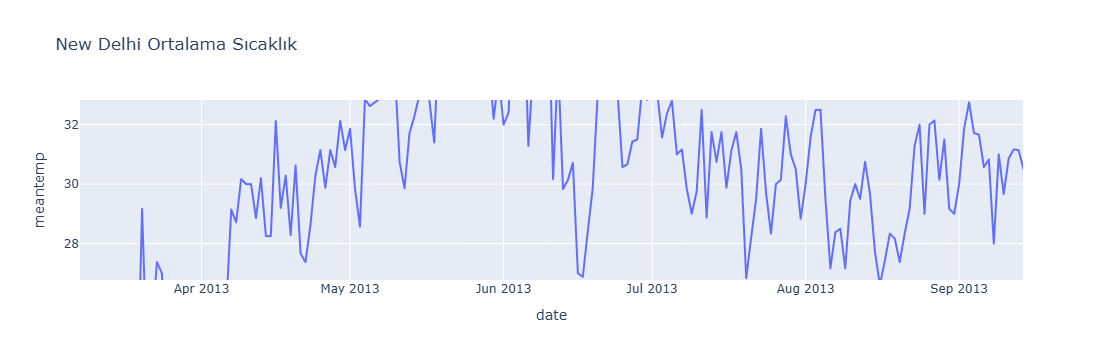

In [27]:
px.line(df,x='date',y='meantemp',title='New Delhi Ortalama Sıcaklık')  #canlı gösterim

<Axes: >

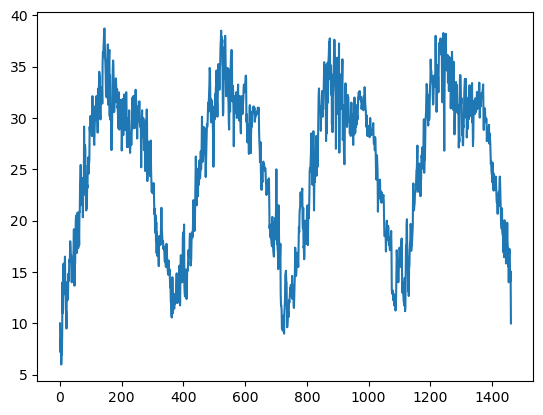

In [21]:
df.meantemp.plot()

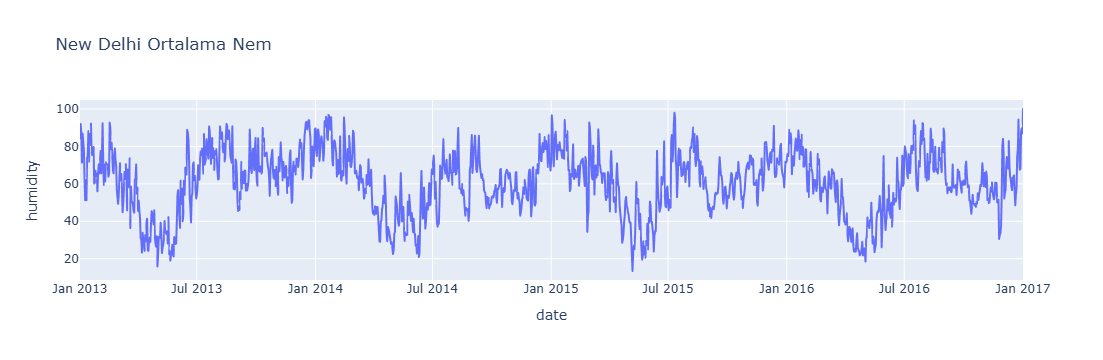

In [29]:
px.line(df,x='date',y='humidity',title='New Delhi Ortalama Nem')

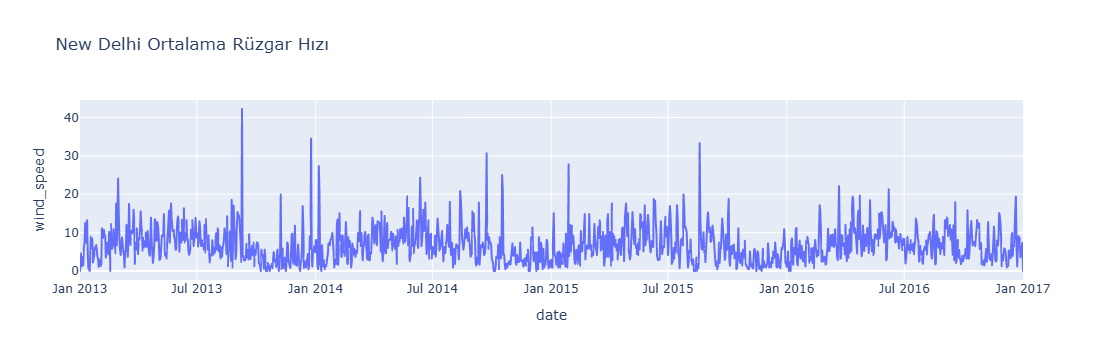

In [31]:
px.line(df,x='date',y='wind_speed',title='New Delhi Ortalama Rüzgar Hızı')

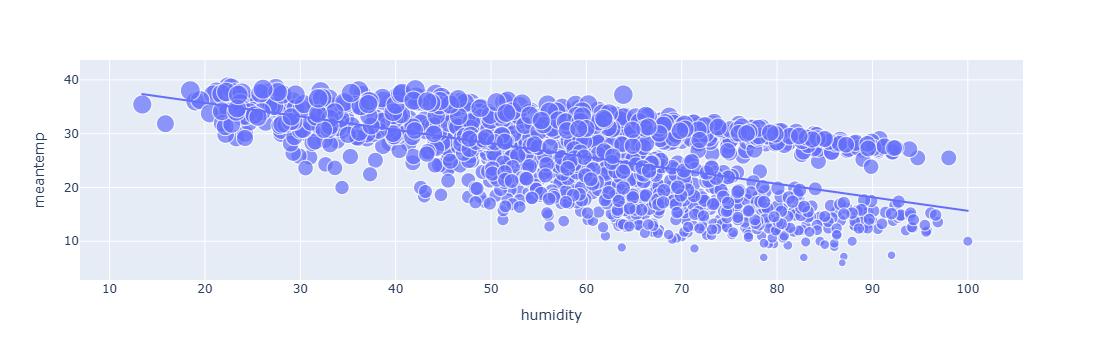

In [33]:
px.scatter(df,x='humidity',y='meantemp',size='meantemp',trendline='ols')

In [35]:
df['date']=pd.to_datetime(df['date'],format='%Y-%m-%d')

In [37]:
df['year']=df['date'].dt.year

In [39]:
df['month']=df['date'].dt.month

In [41]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


<Axes: xlabel='month', ylabel='meantemp'>

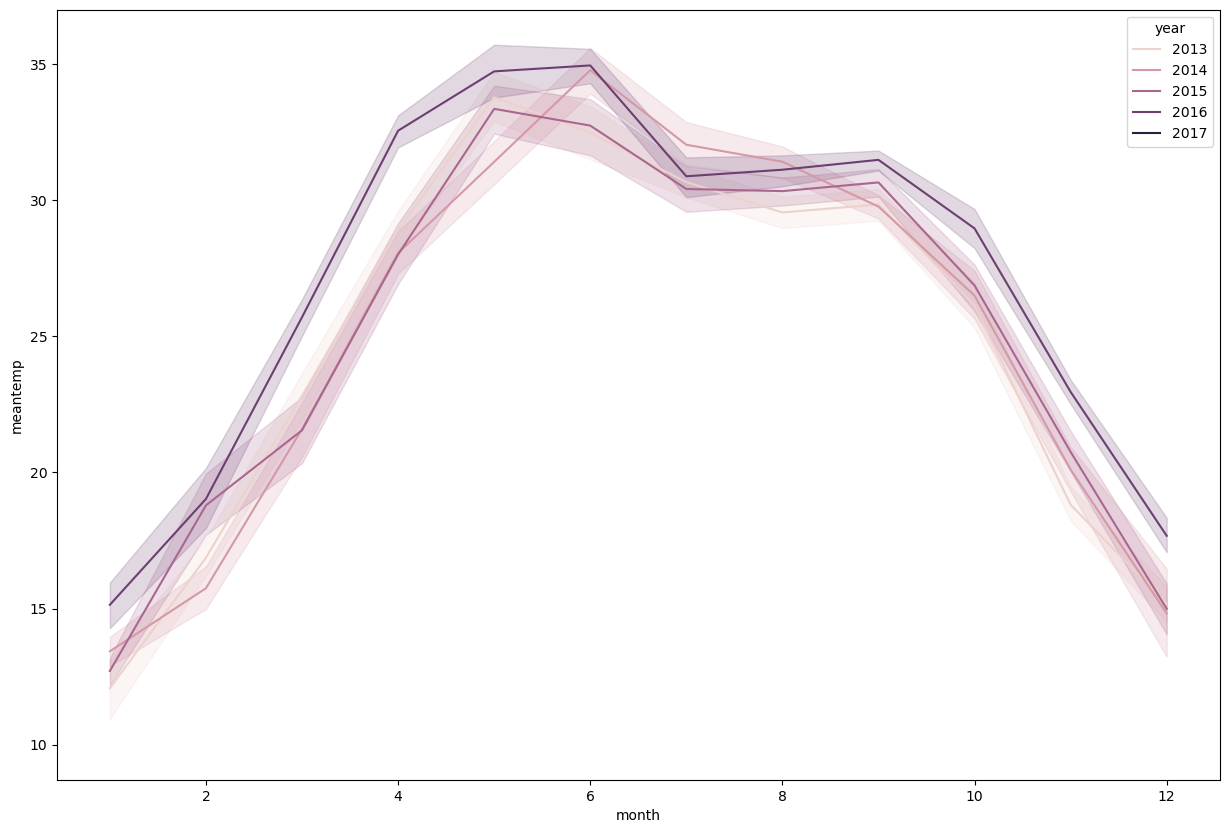

In [43]:
plt.figure(figsize=(15,10))
sns.lineplot(df,x='month',y='meantemp',hue='year')

In [47]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,year,month
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,2013,1
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,2013,1
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,2013,1
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,2013,1
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,2013,1


In [49]:
#timeseries te en sondan veri alırız train test split teki random 42 gibi birşey yapmayız

In [53]:
#pip install prophet

In [55]:
#meantemp 'i y olarka yapınca prophet otomatik anlıyor onu tahmin edeceğimizi

In [63]:
forecast_data=df.rename(columns={'date':'ds','meantemp':'y'})

01:20:37 - cmdstanpy - INFO - Chain [1] start processing
01:20:38 - cmdstanpy - INFO - Chain [1] done processing


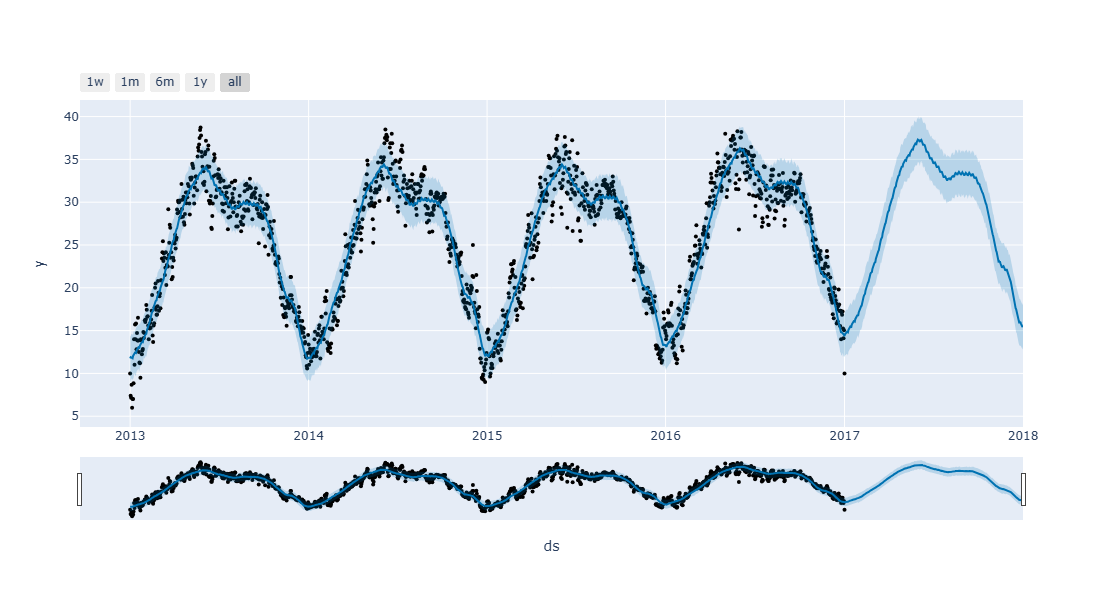

In [65]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)